# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('./data/employee_churn_data.csv')

df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


# 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

# I. Employee Turnover

The data essentially has 6 non-numerical features : department, promoted, projects, salary, tenure,and bonus, with one target left or not. The data also has 3 numerical features: review, satisfaction, and avg_hrs_month.

We would like to understand the employee turnover across 6 different categories: department, salary, tenure, bonus, promotion and number of projects. We will plot the proportion of leaving vs not leaving the companies across these 6 categories.

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

df['promoted'].replace(0,'not promoted',inplace=True)
df['promoted'].replace(1,'promoted',inplace=True)


def plot_prop(category,df):
    import matplotlib.pyplot as plt

    df_prop=df.groupby([category,'left'])['promoted'].count()/df.groupby([category])['promoted'].count()
    df_prop=df_prop.unstack()
    df_prop.sort_values(by=['no'],inplace=True)



    df_left=df.groupby([category,'left'])['promoted'].count()
    df_left=df_left.unstack()
    df_left.sort_values(by=['yes'],inplace=True,ascending=False)


    fig,axs=plt.subplots(1,2,figsize=(10,3))

    df_prop.plot.bar(stacked=True,ax=axs[0])
    axs[0].set_title(' Proportion of leaving vs stay')

    df_left.plot.bar(stacked=True,ax=axs[1])
    axs[1].set_title(' Numbers of leaving')
    


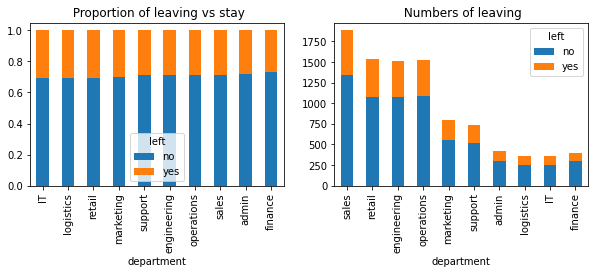

In [3]:
plot_prop('department',df)

From plot above it seems that the proportion of turnover is pretty much the same across department with IT being the highest and finance being the lowest. However becasue there are more sales people, the number of sales person leaving the company is the highest across all departments with signifficant difference.

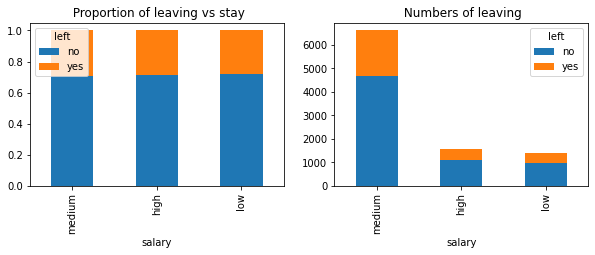

In [4]:
plot_prop('salary',df)

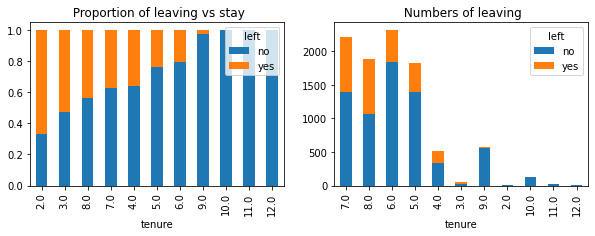

In [5]:
plot_prop('tenure',df)

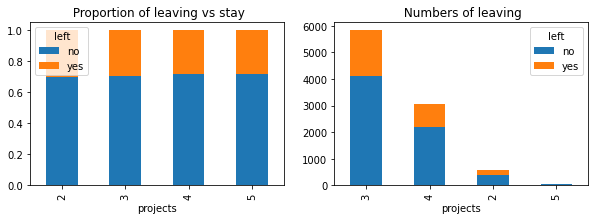

In [6]:
plot_prop('projects',df)

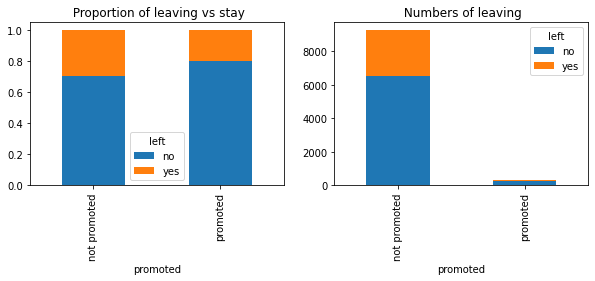

In [7]:
plot_prop('promoted',df)

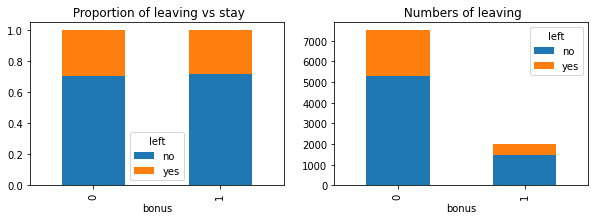

In [8]:
plot_prop('bonus',df)

From first plot, we can see although the numbers of leaving per department varying, the proportion is roughly the same. The same conclusion can be seen for categories salary, bonus and project. This seems to suggest that the probability of leaving or staying is independent of any of these 4 categories. We will check this later by calculating the p-value of chi2 test statistics.

Interestingly enough, only two features that seem to be correlated with the proportion of leaving/not leaving : tenure and promotion. This is clearly depicted in the plot in which almost all employees who have been working  more than 9 years stay at the company. Promotion is also a big factor in which those who have been promoted are more likely to stay at the company. These two conclusions seem to be in agreement with our expectation.
Again, we will also do chi2 test to see if leaving/not leaving decision dependence on these 2 features are statistically signifficant or not. 

# II. Predictors of Turnover

In this part we will test if the decision to leave depends on the 6 categories. We will use chi2 test for this part.

1. department
2. salary
3. bonus
4. promoted
5. projects
6. tenure


In [9]:
from scipy.stats import chi2_contingency 

def independende_chi2(df,cat_cols,target):
    chi_statistic=[]
    p_val=[]
    vars_rm=[]

    for i in df[cat_cols]:
        observed=pd.crosstab(index=df[target], columns=df[i])
        stat, p, dof, expected=chi2_contingency(observed)
        chi_statistic.append(stat)
        p_val.append(p)
        if p >= 0.05:
            print("Left and {} are independent (p-value = {:.2f}).\n".format(i,p))
            vars_rm.append(i)
        else:
            print("Left and {} are dependent (p-value = {:.2f}).\n".format(i,p))
    
    return p_val,chi_statistic

cat_cols=df.select_dtypes(include="object").columns.tolist() 
cat_cols=['salary','department','tenure','projects','promoted','bonus']

p_val,chi_statistic=independende_chi2(df,cat_cols,'left')

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val

print('   ')
print( 'categories that affect the decision ')
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=False)
display(chi_df)

Left and salary are independent (p-value = 0.56).

Left and department are independent (p-value = 0.84).

Left and tenure are dependent (p-value = 0.00).

Left and projects are independent (p-value = 0.68).

Left and promoted are dependent (p-value = 0.00).

Left and bonus are independent (p-value = 0.27).

   
categories that affect the decision 


,Variable,Chi_Statistic,P_value
4,promoted,12.435725,4.211987e-04
2,tenure,660.285954,2.092193e-135


Our calculation confirms our previous finding, in which of these 6 categories, only categories promotion and tenure that are not independent of decision to leave or stay, meaning these two categories affect the decision of the employee. 


In developing models to preidict the decision, we will  omit the 4 categories (independent) and only include the 2 (dependent) categories. In additon to these 2 categories, we still have three variables which are : average hours per month, review, and satisfaction.

So far we have tested the independence for 6 discrete features, and we still need to do the similar test for 3 numerical features namely: satisfaction, review, and avg_hrs_month.
The independence test between any of these 3 variables with employee decision is difficult to do, because those 3 variables are continuous. One possible way to 'solve' this problem is by first converting these 3 variables from continuous to discrete representation. In particular, each of them will be categorized into low, medium and high, with 'qcut' (quartile cut) command.



In [10]:
bin_review_3 = ['low', 'medium', 'high']
df['review_3'] = pd.qcut(df['review'],
                              q=3,
                              labels=bin_review_3)

bin_satisfaction_3=['low', 'medium', 'high']
df['satisfaction_3'] = pd.qcut(df['satisfaction'],
                              q=3,
                              labels=bin_satisfaction_3)
bin_satisfaction_5=['low', 'low-med','medium','medium-high', 'high']
df['satisfaction_5'] = pd.qcut(df['satisfaction'],
                              q=5,
                              labels=bin_satisfaction_5)


bin_hours_3=['low', 'medium', 'high']
df['avg_hrs_3'] = pd.qcut(df['avg_hrs_month'],
                              q=3,
                              labels=bin_hours_3)


cat_cols=['review_3','satisfaction_3','satisfaction_5','avg_hrs_3']
p_val,chi_statistic=independende_chi2(df,cat_cols,'left')

Left and review_3 are dependent (p-value = 0.00).

Left and satisfaction_3 are dependent (p-value = 0.04).

Left and satisfaction_5 are dependent (p-value = 0.02).

Left and avg_hrs_3 are dependent (p-value = 0.00).



This test shows that the decision to leave depends on these 3 variables/features.

# Machine Learning Algorithm

In this part we will use several types of machine learning algorithms:<br>
i. Decision Tree<br>
ii. Random Forest<br>
iii. knn <br>
iv. Support Vector Machine <br>

Decision Tree is used because it is simple to interpret, and Random Forest will improve the performance. We may have guessed that employees are clustered and the clusters may have strong correlation with their decision to leave. This is the reason we use knn, a simple nearest neightboor algorithm. Further more, the decision boundary to separate two clusters of employee may not be a linear line,and this is the reason we bring Support Vector Machine to the table.
                            

In [11]:

def dectree(X_train,y_train,X_test,y_test,ax):
    import matplotlib.pyplot as plt

    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42,max_depth=5)
    clf.fit(X_train,y_train)
    score_train=clf.score(X_train,y_train)
    score_test=clf.score(X_test,y_test)
    print('train and test score : ',score_train,score_test)
    
    importances = clf.feature_importances_
    feature_names=X_train.columns
    forest_importances = pd.Series(importances, index=feature_names)
    forest_importances.plot.bar(ax=ax)
    return clf.predict(X_test)



def randforest(X_train,y_train,X_test,y_test,ax):
    
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train,y_train)
    score_train=clf.score(X_train,y_train)
    score_test=clf.score(X_test,y_test)
    
    importances = clf.feature_importances_

    print('train and test score : ',score_train,score_test)
    #print (importances)
    feature_names=X_train.columns
    forest_importances = pd.Series(importances, index=feature_names)

    forest_importances.plot.bar(ax=ax)
    return clf.predict(X_test)

def knn( X_train,y_train,X_test,y_test,ax):
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    score_train=neigh.score(X_train,y_train)
    
    score_test=neigh.score(X_test,y_test)
    print(score_train,score_test)
    return neigh.predict(X_test)
    
def svm( X_train,y_train,X_test,y_test,ax):
    from sklearn import svm   
    
    X=X_train.values.copy()
    X=X[:, :2]
    
    print('apa')
    clf = svm.SVC(kernel='rbf',gamma=10)

    if (y_train.shape[0]>1):
        y_train=np.argmax(y_train.values,axis=1)
        y_test=np.argmax(y_test.values,axis=1)

    clf.fit(X_train, y_train)
    score_train=clf.score(X_train,y_train)
    
    score_test=clf.score(X_test,y_test)
    print(score_train,score_test)
    
    return clf.predict(X_test)

We also need to transform data using OneHotEncoder

In [12]:
def transform_data (  df,feat_categ,feat_num  ):
    
    from sklearn.utils import shuffle
    
    df.reset_index(drop=True, inplace=True)
    features_categ=feat_categ

    features_Y=['left']
    features_X_numeric=feat_num

    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder(handle_unknown='ignore')


    X= pd.DataFrame(index=df.index)
    for features in features_categ:
        enc = OneHotEncoder(handle_unknown='ignore')
        enc_df = pd.DataFrame( enc.fit_transform(df[[features]]).toarray()  )
        enc_df.columns=enc.categories_


        X=pd.concat([X,enc_df],axis=1)


    X=pd.concat([X,df[features_X_numeric]],axis=1  )

    Y=pd.DataFrame(index=df.index)
    for features in features_Y:
        enc = OneHotEncoder(handle_unknown='ignore')
        enc_df = pd.DataFrame( enc.fit_transform(df[[features]]).toarray())
        enc_df.columns=enc.categories_
        Y=pd.concat([Y,enc_df],axis=1)

    return X,Y



def runsim(df,feat_categ,feat_num,method,ax):


    X,Y=transform_data( df,feat_categ,feat_num  )
    train_size=int(0.75*X.shape[0])
    X_train=X.iloc[:train_size]
    Y_train=Y.iloc[:train_size]
    X_test=X.iloc[train_size:]
    Y_test=Y.iloc[train_size:]
    
    Y_pred=method(X_train,Y_train,X_test,Y_test,ax)
    return X_test,Y_test,Y_pred

def runsim2(df,feat_categ,feat_num,method):

    X,Y=transform_data( df,feat_categ,feat_num  )
    train_size=int(0.75*X.shape[0])
    X_train=X.iloc[:train_size]
    Y_train=Y.iloc[:train_size]
    X_test=X.iloc[train_size:]
    Y_test=Y.iloc[train_size:]
    
    Y_pred=method(X_train,Y_train,X_test,Y_test)
    return X_test,Y_test,Y_pred



## Feature Importances

Now we want to use decision tree and random forest algorithm to find the importances of the features. Here we do feature scaling so that each feature contributes approximately proportionate to the distance metric.

train and test score :  0.8580013976240392 0.8540880503144654
train and test score :  0.9998602375960867 0.8645702306079665


Text(0.5, 1.0, 'Feature Importance -Random Forest')

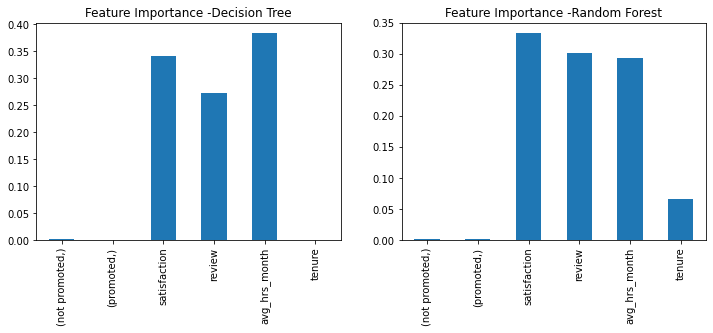

In [13]:
from sklearn.utils import shuffle

#df = pd.read_csv('./data/employee_churn_data.csv')
feat_numeric=['review', 'tenure',
           'satisfaction', 'avg_hrs_month']

df[feat_numeric]=(df[feat_numeric]-df[feat_numeric].mean())/df[feat_numeric].std()


df=shuffle(df)

fig,axs=plt.subplots(1,2,figsize=(12,4))
X_t,Y_t,Y_pred=runsim(df,['promoted'],['satisfaction','review','avg_hrs_month','tenure'],dectree,axs[0])
X_t,Y_t,Y_pred=runsim(df,['promoted'],['satisfaction','review','avg_hrs_month','tenure'],randforest,axs[1])

axs[0].set_title('Feature Importance -Decision Tree')
axs[1].set_title('Feature Importance -Random Forest')



Our feature importances analysis seem to suggest that satisfaction is the most important feature. However this may be misleading because there is 'multicolinearity' effect that we have not analyzed properly yet. For this purpose we will do permutation importance, in which we will shuffle data in one feature and see how much the accuracy reduces. The larger the changes, the more important the feature is.

In [14]:
from sklearn.ensemble import RandomForestClassifier

feat_categ=['promoted']
feat_num=['satisfaction','review','avg_hrs_month','tenure']

X,Y=transform_data( df,feat_categ,feat_num  )
train_size=int(0.75*X.shape[0])
X_train=X.iloc[:train_size]
Y_train=Y.iloc[:train_size]
X_test=X.iloc[train_size:]
Y_test=Y.iloc[train_size:]
    
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,Y_train)
score_train=clf.score(X_train,Y_train)
score_test=clf.score(X_test,Y_test)
    
importances = clf.feature_importances_

feature_names=X_train.columns
forest_importances = pd.Series(importances, index=feature_names)
Y_pred=clf.predict(X_test)


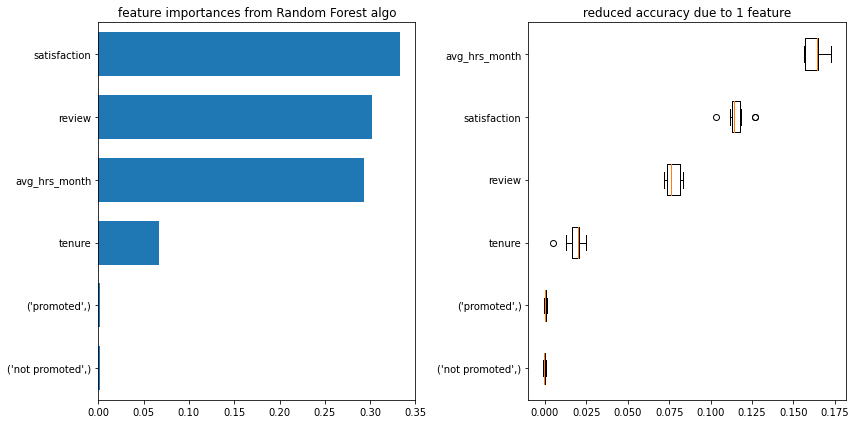

In [15]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, Y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_train.columns[perm_sorted_idx],
)
ax1.set_title('feature importances from Random Forest algo')
ax2.set_title(' reduced accuracy due to 1 feature ')
fig.tight_layout()
plt.show()

## Feature Importances and Permutation Importances
The plot on the right shows that when avg_hrs_month data is shuffled, the accuracy is reduced the most. Therefore this feature is the most important feature. The next important features are satisfaction, review, tenure, and promotion.

Based on this, we want to remove the 'multicolinearity' and test if the accuracy still holds. One possible way to find closest feature is by using hierarchical clustering of correlation matrices. The higher the correlation between 2 features, the lower the distance between these 2 features, and the more likely they will be in the same cluster.

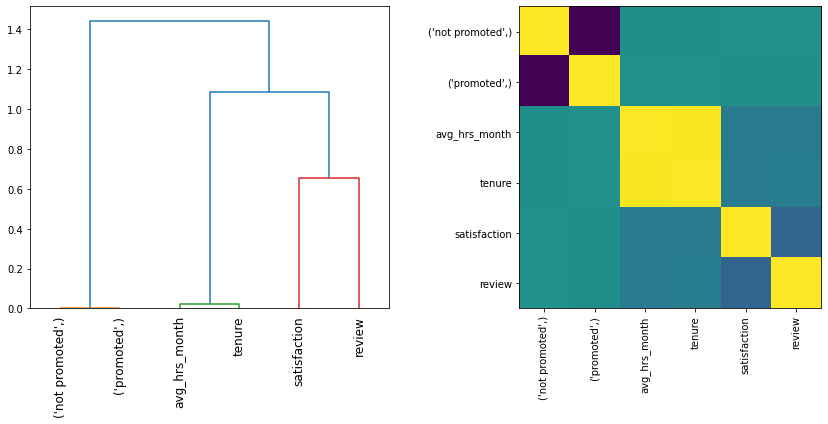

In [16]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X_train.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [17]:
from collections import defaultdict


cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

print('selected features ',selected_features)

selected features  [0, 2, 4]


We can further remove feature 0 : category not promoted, because the accuracy reduced for that feature is so small. We'll only keep the 2 an 4 features : avg_hrs_month and satsifaction.

In [18]:
selected_features=[2,4]
X_train_sel = X_train.values[:, selected_features]
X_test_sel = X_test.values[:, selected_features]

clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, Y_train)
print(
    "Accuracy on test data with features removed: {:.2f}".format(
        clf_sel.score(X_test_sel, Y_test)
    )
)


Accuracy on test data with features removed: 0.83


It is clear from here that accuracy reduced only ~0.01-0.02 when we only keep these 2 features: avg_hrs_month and satisfaction. 
So after removing multicolinearity we can conclude that avg_hrs_month is the most important feature and satisfaction is the 2nd most important feature.

#  III. Recommendation
From previous analysis we have arrived here where we keep only two features namely: satisfaction and avg hours per month, and we'll apply simple decision tree to get some idea on how the decision process is done.

### Decision Tree

In the first part we'll use decision tree, with max_depth =3




In [19]:
def dectree_plot(X_train,y_train,X_test,y_test):
    import matplotlib.pyplot as plt

    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42,max_depth=3)
    clf.fit(X_train,y_train)
    score_train=clf.score(X_train,y_train)
    score_test=clf.score(X_test,y_test)
    
    importances = clf.feature_importances_
    feature_names=X_train.columns
    #print(clf.feature_importances_)
    print(' tree diagaram ')
    text_representation = tree.export_text(clf,feature_names=['satisfaction','avg_hrs_month'])
    print(text_representation)
    return clf.predict(X_test)

X_t,Y_t,Y_pred=runsim2(df,[],['satisfaction','avg_hrs_month'],dectree_plot)


 tree diagaram 
|--- avg_hrs_month <= 1.20
|   |--- avg_hrs_month <= 0.39
|   |   |--- satisfaction <= 0.04
|   |   |   |--- class: 1
|   |   |--- satisfaction >  0.04
|   |   |   |--- class: 1
|   |--- avg_hrs_month >  0.39
|   |   |--- satisfaction <= -0.04
|   |   |   |--- class: 1
|   |   |--- satisfaction >  -0.04
|   |   |   |--- class: 0
|--- avg_hrs_month >  1.20
|   |--- satisfaction <= -1.52
|   |   |--- class: 0
|   |--- satisfaction >  -1.52
|   |   |--- satisfaction <= -0.79
|   |   |   |--- class: 1
|   |   |--- satisfaction >  -0.79
|   |   |   |--- class: 1



Decision tree seems to suggest that employee with high avg hours but low satisfaction, will leave the company. 
It also suggest that employee with low avg hours and low satisfaction will also leave the company.

### Support Vector Machine

Here we use SVM to draw non linear decision boundary condition , and for this purpose we will use rbf kernel ,with gama =10

accuracy score 0.8512578616352201
confusion matrix
[[6400  356]
 [1063 1721]]


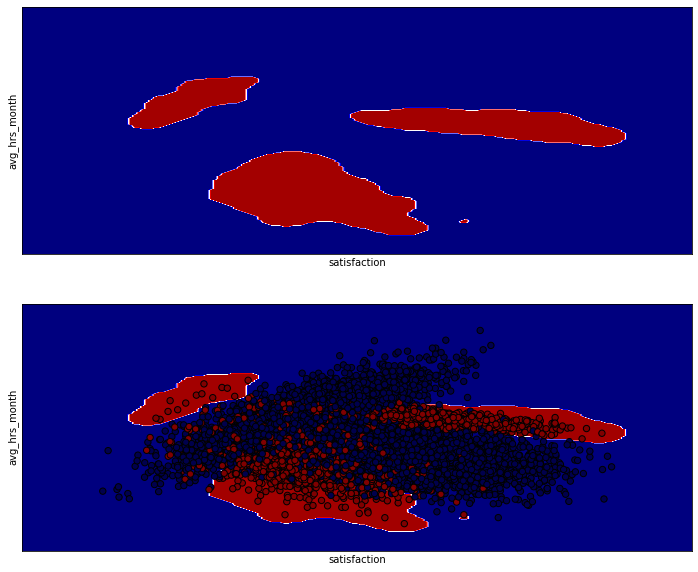

In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

feat_categ=[]
feat_numeric=['satisfaction','review','avg_hrs_month']
Xasli,Yasli=transform_data (  df,feat_categ,feat_numeric  )

def plot_svm(Xasli,Yasli,fig,axs):
    
    def make_meshgrid(x, y, h=.05):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1

    
        xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)   )
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    l_x='satisfaction'
    l_y='avg_hrs_month'
    
    X=Xasli.to_numpy()
    X[:,0]=Xasli[l_x].values
    X[:,1]=Xasli[l_y].values


    X=X[:,:2]
    y=Yasli.values.argmax(axis=1)
    
    
    model = svm.SVC(kernel='rbf',gamma=10)
    clf = model.fit(X, y)

    X=Xasli.to_numpy()

    X[:,0]=Xasli[l_x].values
    X[:,1]=Xasli[l_y].values


    X=X[:,:2]
    y=Yasli.values.argmax(axis=1)
    #y=Yasli.loc[mask].values.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    print('accuracy score',clf.score(X,y))
    
    print('confusion matrix')
    print(confusion_matrix(y, clf.predict(X))  )

    
    plot_contours(axs[0], clf, xx, yy, cmap=plt.cm.seismic, alpha=1)
    plot_contours(axs[1], clf, xx, yy, cmap=plt.cm.seismic, alpha=1)
    axs[1].scatter(X0, X1, c=y, cmap=plt.cm.seismic, s=40, edgecolors='k',alpha=1)
    axs[0].set_ylabel(l_y)
    axs[0].set_xlabel(l_x)
    axs[0].set_xticks(())
    axs[0].set_yticks(())
    axs[0].set_title='Decision Boundary'
    

    axs[1].set_ylabel(l_y)
    axs[1].set_xlabel(l_x)
    axs[1].set_xticks(())
    axs[1].set_yticks(())
    axs[1].set_title='Satisfaction vs Avg Hours'
    


fig,axs=plt.subplots(2,1,figsize=(12,10))
plot_svm(Xasli,Yasli,fig,axs)


The contour plot using SVM result is very interesting, here the algo created 3 clusters of employee with decision to leave the company. 

The first cluster on the top left is easy to understand, these are employee who worked long hour with low satisfaction. It makes sense they decided to leave. It is then important to know why they are not satisfied with their work and if that has anything to do with their relatively high avg hrs per month or with other factors.

The second cluster on the bottom is employees with low average hours per month who are somewhat satisfied. This cluster may refer to employee who are not assigned high enough average hours per month. It is recommended to analyze why the are assigned low avg hours per month, and if increasing avg hours per month may make them more likely to stay.

The third cluster on the top right, is those who have high satisfaction and relatively high average hours per month but still decide to leave. This seems to indicate group of employee who despite their satisfaction,may want more/different kind of challenges/need and decide to leave the company.It is recommended to analyze what type of challenges they need to make them more likely to stay, for example giving them more projects that require more hours may make them feel challenged.